## **원래 모델**

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [13]:
fashion_mnist2 = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist2.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten 층은 입력 이미지를 1d vector 로 변환한다.
model.add(keras.layers.Dense(784, activation="relu"))# 뉴런 300 개를 가지는 hidden layer 를 추가한다. # activation 은 relu 사용
model.add(keras.layers.Dense(100, activation="relu"))# 이번에는 뉴런 100개를 가지는 hidden layer 를 또 추가한다.
model.add(keras.layers.Dense(10, activation="softmax"))# 마지막 출력은 다중 lable 문제이므로 softmax 를 사용한다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6868 - accuracy: 0.7738 - val_loss: 0.5472 - val_accuracy: 0.7974
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4742 - accuracy: 0.8340 - val_loss: 0.4413 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4294 - accuracy: 0.8490 - val_loss: 0.4139 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4026 - accuracy: 0.8593 - val_loss: 0.3971 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3816 - accuracy: 0.8666 - val_loss: 0.4044 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3661 - accuracy: 0.8714 - val_loss: 0.3596 - val_accuracy: 0.8760
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3518 - accuracy: 0.8757 - val_loss: 0.3482 - val_accu

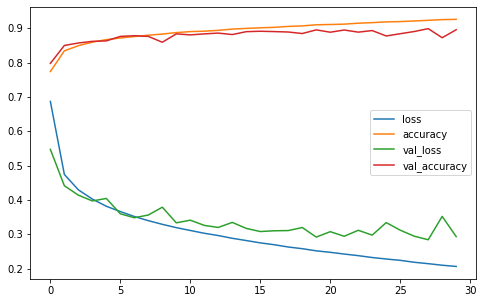

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8839


[0.3286270201206207, 0.883899986743927]

## **Shortcut 모델**

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:
Image("C:/keras/shortcut.png")

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train2 = X_train.reshape((55000,28*28))
X_valid2 = X_valid.reshape((5000,28*28))

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
input_ = keras.layers.Input(shape= X_train2.shape[1:])
# input 객체를 만들어야 한다. 이 객체는 shape / dtype 을 포함해서 모델의 입력을 정의합니다.
hidden1 = keras.layers.Dense(784,activation="relu")(input_) # 옆의 () 는 input 을 어떤것을 받느냐이다.
# layer 들을 형성합니다. 
# 이 층은 만들어지자 마자 입력과 함께 함수처럼 호출됩니다. (input_) 이 옆에 붙어있음. 그래서 함수형 api 라고 한다.
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
# 두번쨰 hidden layer 를 형성합니다. 
concat = keras.layers.concatenate([input_, hidden2])
# concatenate 층을 만들고 또 다시 함수처럼 호출하여 두번쨰 은닉층의 출력과, 처음의 입력을 연결합니다.
output = keras.layers.Dense(10, activation="softmax")(concat) 
# 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 활용해 호출합니다.
model = keras.models.Model(inputs=[input_], outputs=[output]) # 마지막 모델에서는 input / output 을 모두 표시해준다.
# 마지막으로 사용할 입력과 출력을 지정해 케라스 model 을 만듭니다.

In [ ]:
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 784)          615440      input_11[0][0]                   
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 100)          78500       dense_19[0][0]                   
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 884)          0           input_11[0][0]                   
                                                                 dense_20[0][0]       

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", metrics = ["accuracy"])


In [ ]:
history = model.fit(X_train2, y_train, epochs=30,validation_data=(X_valid2,y_valid))


Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7683 - accuracy: 0.7535 - val_loss: 0.5501 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5192 - accuracy: 0.8239 - val_loss: 0.4673 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4674 - accuracy: 0.8375 - val_loss: 0.5013 - val_accuracy: 0.8158
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4394 - accuracy: 0.8472 - val_loss: 0.4231 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4207 - accuracy: 0.8541 - val_loss: 0.3996 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4028 - accuracy: 0.8603 - val_loss: 0.3917 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3903 - accuracy: 0.8639 - val_loss: 0.3843 - val_ac

In [ ]:
X_test2 = X_test.reshape((10000,28*28))

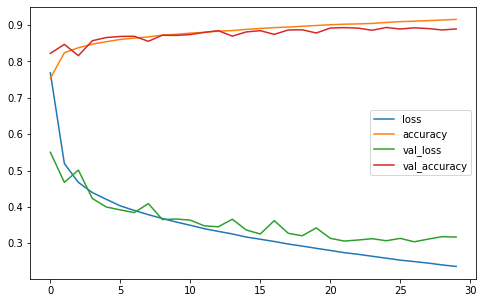

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [ ]:
model.evaluate(X_test2, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8779


[0.34773963689804077, 0.8779000043869019]

## **Multiple Input Model**

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [25]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [29]:
np.random.seed(48)
tf.random.set_seed(48)

In [34]:
X_train3 = X_train.reshape((55000,28*28))
X_valid3 = X_valid.reshape((5000,28*28))
X_test3 = X_test. reshape((10000,28*28))

In [35]:
input_A = keras.layers.Input(shape=[392], name="wide_input") 

input_B = keras.layers.Input(shape=[392], name="deep_input")

hidden1 = keras.layers.Dense(784, activation="relu")(input_B)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, name="output", activation="softmax")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics = ["accuracy"])

X_train_A, X_train_B = X_train3[:, :392], X_train3[:, 392:] #
X_valid_A, X_valid_B = X_valid3[:, :392], X_valid3[:, 392:] #
X_test_A, X_test_B = X_test3[:, :392], X_test3[:, 392:]
X_new_A, X_new_B = X_test_A[:392], X_test_B[:392]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
# fit 과정에서 X_train 부분이 2dim 의 tuple 로 대체되었음을 기억하자.


Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2883 - accuracy: 0.9000 - val_loss: 0.3336 - val_accuracy: 0.8886
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2852 - accuracy: 0.9009 - val_loss: 0.3331 - val_accuracy: 0.8870
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2822 - accuracy: 0.9013 - val_loss: 0.3360 - val_accuracy: 0.8862
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2795 - accuracy: 0.9023 - val_loss: 0.3357 - val_accuracy: 0.8864
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2768 - accuracy: 0.9035 - val_loss: 0.3323 - val_accuracy: 0.8858
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2736 - accuracy: 0.9049 - val_loss: 0.3357 - val_accuracy: 0.8872
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2713 - accuracy: 0.9051 - val_loss: 0.3315 - val_accurac

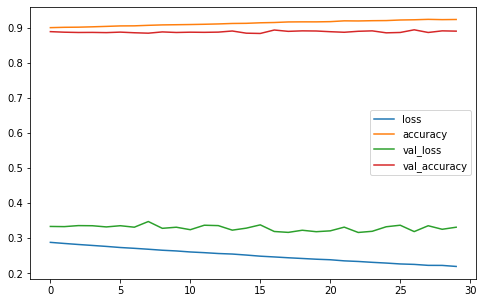

In [42]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [43]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

313/313 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8765
